In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
import numpy as np
from scipy.stats import pearsonr
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Data Profiling of COVID-19 Epidemology

In [3]:
pathEpi = '/content/drive/MyDrive/2024_Spring/RBDA/Final_Project/final_joins_csv/epidemiology.csv'
df = pd.read_csv(pathEpi)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'])
# Convert float64 columns to int (after ensuring there are no NaN values which cannot be converted to int)
float_columns = ['new_confirmed', 'new_deceased', 'new_recovered', 'new_tested',
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested']
for column in float_columns:
    # It's important to fill NaN values because NaN cannot be converted to int
    df[column] = df[column].fillna(0).astype(int)

# Convert 'location_key' to string
df['location_key'] = df['location_key'].astype(str)
df.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0,0,0,0,0,0,0,0
1,2020-01-02,AD,0,0,0,0,0,0,0,0
2,2020-01-03,AD,0,0,0,0,0,0,0,0
3,2020-01-04,AD,0,0,0,0,0,0,0,0
4,2020-01-05,AD,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   location_key          object        
 2   new_confirmed         int64         
 3   new_deceased          int64         
 4   new_recovered         int64         
 5   new_tested            int64         
 6   cumulative_confirmed  int64         
 7   cumulative_deceased   int64         
 8   cumulative_recovered  int64         
 9   cumulative_tested     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 955.6+ MB


In [7]:

print(df.describe())  # Provides count, mean, std, min, max, and quantiles for numerical columns
print(df['location_key'].value_counts())  # Frequency count of locations



                                date  new_confirmed  new_deceased  \
count                       12525825   1.252582e+07  1.252582e+07   
mean   2021-05-27 09:09:11.003419136   1.107464e+02  1.187424e+00   
min              2019-12-31 00:00:00  -5.045418e+06 -6.381100e+04   
25%              2020-10-29 00:00:00   0.000000e+00  0.000000e+00   
50%              2021-05-22 00:00:00   1.000000e+00  0.000000e+00   
75%              2021-12-24 00:00:00   1.100000e+01  0.000000e+00   
max              2022-12-30 00:00:00   5.047094e+06  6.383000e+04   
std                              NaN   1.163653e+04  8.500915e+01   

       new_recovered    new_tested  cumulative_confirmed  cumulative_deceased  \
count   1.252582e+07  1.252582e+07          1.252582e+07         1.252582e+07   
mean    6.687845e+01  6.400054e+02          3.483791e+04         5.381417e+02   
min    -1.001683e+07 -3.541552e+08          0.000000e+00         0.000000e+00   
25%     0.000000e+00  0.000000e+00          1.800000e+

In [9]:
df.isnull().sum()  # Null count in each column

date                    0
location_key            0
new_confirmed           0
new_deceased            0
new_recovered           0
new_tested              0
cumulative_confirmed    0
cumulative_deceased     0
cumulative_recovered    0
cumulative_tested       0
dtype: int64

In [15]:
max_value = df['cumulative_confirmed'].max()
print("Maximum Cumulative Confirmed Cases:", max_value)

# Minimum value
min_value = df['cumulative_confirmed'].min()
print("Minimum Cumulative Confirmed Cases:", min_value)

# Median value
median_value = df['cumulative_confirmed'].median()
print("Median Cumulative Confirmed Cases:", median_value)

# Standard Deviation
std_dev = df['cumulative_confirmed'].std()
print("Standard Deviation of Cumulative Confirmed Cases:", std_dev)

Maximum Cumulative Confirmed Cases: 92440495
Minimum Cumulative Confirmed Cases: 0
Median Cumulative Confirmed Cases: 989.0
Standard Deviation of Cumulative Confirmed Cases: 608630.024916831


In [17]:
max_value = df['cumulative_tested'].max()
print("Maximum Cumulative tested Cases:", max_value)

# Minimum value
min_value = df['cumulative_tested'].min()
print("Minimum Cumulative tested Cases:", min_value)

# Median value
median_value = df['cumulative_tested'].median()
print("Median Cumulative tested Cases:", median_value)

# Standard Deviation
std_dev = df['cumulative_confirmed'].std()
print("Standard Deviation of Cumulative Confirmed Cases:", std_dev)

Maximum Cumulative tested Cases: 9214000000
Minimum Cumulative tested Cases: 0
Median Cumulative tested Cases: 0.0
Standard Deviation of Cumulative Confirmed Cases: 608630.024916831


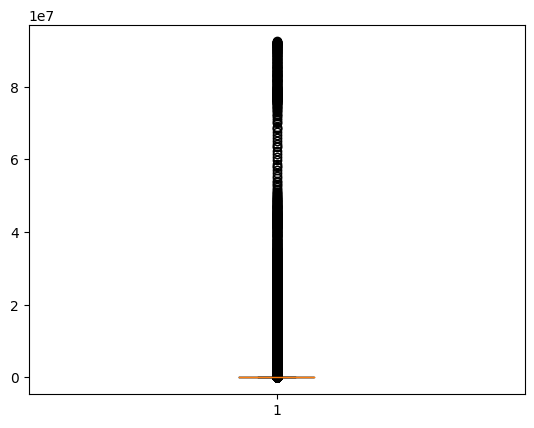

In [14]:
# detect outliers
plt.boxplot(df.cumulative_confirmed)
plt.show()

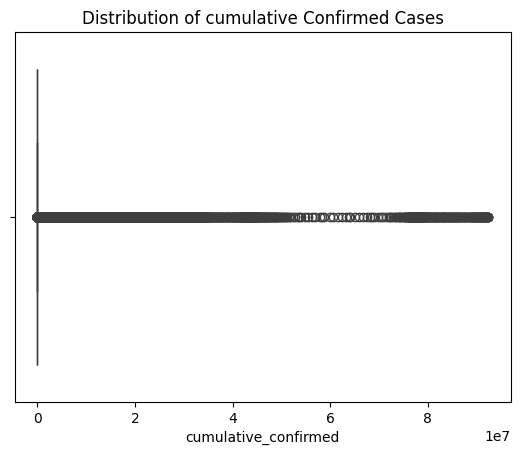

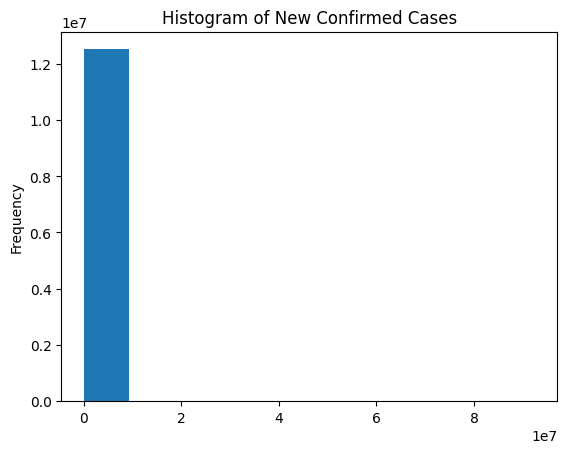

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='cumulative_confirmed')
plt.title('Distribution of cumulative Confirmed Cases')
plt.show()

df['cumulative_confirmed'].plot(kind='hist', title='Histogram of New Confirmed Cases')
plt.show()